In [1]:
# | hide
# skip
! [ -e /content ] && pip install -Uqq model_inspector nbdev
# For colab. Restart the runtime after running this cell!

In [2]:
# | default_exp inspect.tree

# Decision Tree

> Inspector functionality specific to tree models

In [3]:
# | export
from typing import Optional

from fastcore.test import test_fig_exists
import matplotlib.pyplot as plt
from nbdev.showdoc import show_doc
import numpy as np
from matplotlib.axes import Axes
from model_inspector.delegate import delegates
from model_inspector.inspect.any_model import _Inspector
from model_inspector.inspect.classifier import _BinInspector, _MultiInspector
from model_inspector.inspect.regressor import _RegInspector
from sklearn.tree import plot_tree

In [4]:
# | export
class _TreeInspector(_Inspector):
    """Decision tree model inspector"""

    @delegates(plot_tree)
    def plot_tree(self, ax: Optional[Axes] = None, **kwargs):
        """Show decision tree."""
        if ax is None:
            # these dimensions seem to work well empirically
            max_size = 50
            depth = (
                kwargs["max_depth"] + 1
                if "max_depth" in kwargs
                else self.model.get_depth()
            )
            fig_height = min(depth * 2.2, max_size)
            width = (
                2 * kwargs["max_depth"]
                if "max_depth" in kwargs
                else self.model.get_n_leaves()
            )
            fig_width = min(width * 3.5, max_size)
            _, ax = plt.subplots(figsize=(fig_width, fig_height))
        kwargs = {"filled": True, "fontsize": 12, **kwargs}
        return plot_tree(
            self.model,
            feature_names=self.X.columns,
            class_names=np.unique(self.y).astype(str),
            ax=ax,
            **kwargs,
        )[0].axes

In [5]:
# | export
class _TreeRegInspector(_TreeInspector, _RegInspector):
    """Decision tree regression model inspector"""

    pass

In [6]:
# | export
class _TreeBinInspector(_TreeInspector, _BinInspector):
    """Decision tree binary classification model inspector"""

    pass

In [7]:
# | export
class _TreeMultiInspector(_TreeInspector, _MultiInspector):
    """Decision tree multiclass model inspector"""

    pass

In [8]:
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from model_inspector import get_inspector

In [9]:
show_doc(_TreeInspector.plot_tree)

---

[source](https://github.com/gsganden/model_inspector/tree/main/blob/main/model_inspector/inspect/tree.py#L25){target="_blank" style="float:right; font-size:smaller"}

### _TreeInspector.plot_tree

>      _TreeInspector.plot_tree (ax:Optional[matplotlib.axes._axes.Axes]=None,
>                                max_depth=None, feature_names=None,
>                                class_names=None, label='all', filled=False,
>                                impurity=True, node_ids=False,
>                                proportion=False, rounded=False, precision=3,
>                                fontsize=None)

Show decision tree.

Remaining parameters are passed to `sklearn.tree._export.plot_tree`.

## Regression Example

In [10]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [11]:
inspector = get_inspector(DecisionTreeRegressor(max_depth=3).fit(X, y), X, y)

In [12]:
# | hide
from sklearn.tree import ExtraTreeClassifier, ExtraTreeRegressor

In [13]:
# | hide
TREE_MODELS = [
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    ExtraTreeClassifier,
    ExtraTreeRegressor,
]

for model_class in TREE_MODELS:
    model = model_class().fit(X, y)
    for method in ["plot_tree"]:
        assert hasattr(get_inspector(model, X, y), method)

In [14]:
# | hide
from model_inspector.inspect.tree import _TreeRegInspector  # noqa: F811

In [15]:
# | hide
assert isinstance(inspector, _TreeRegInspector)

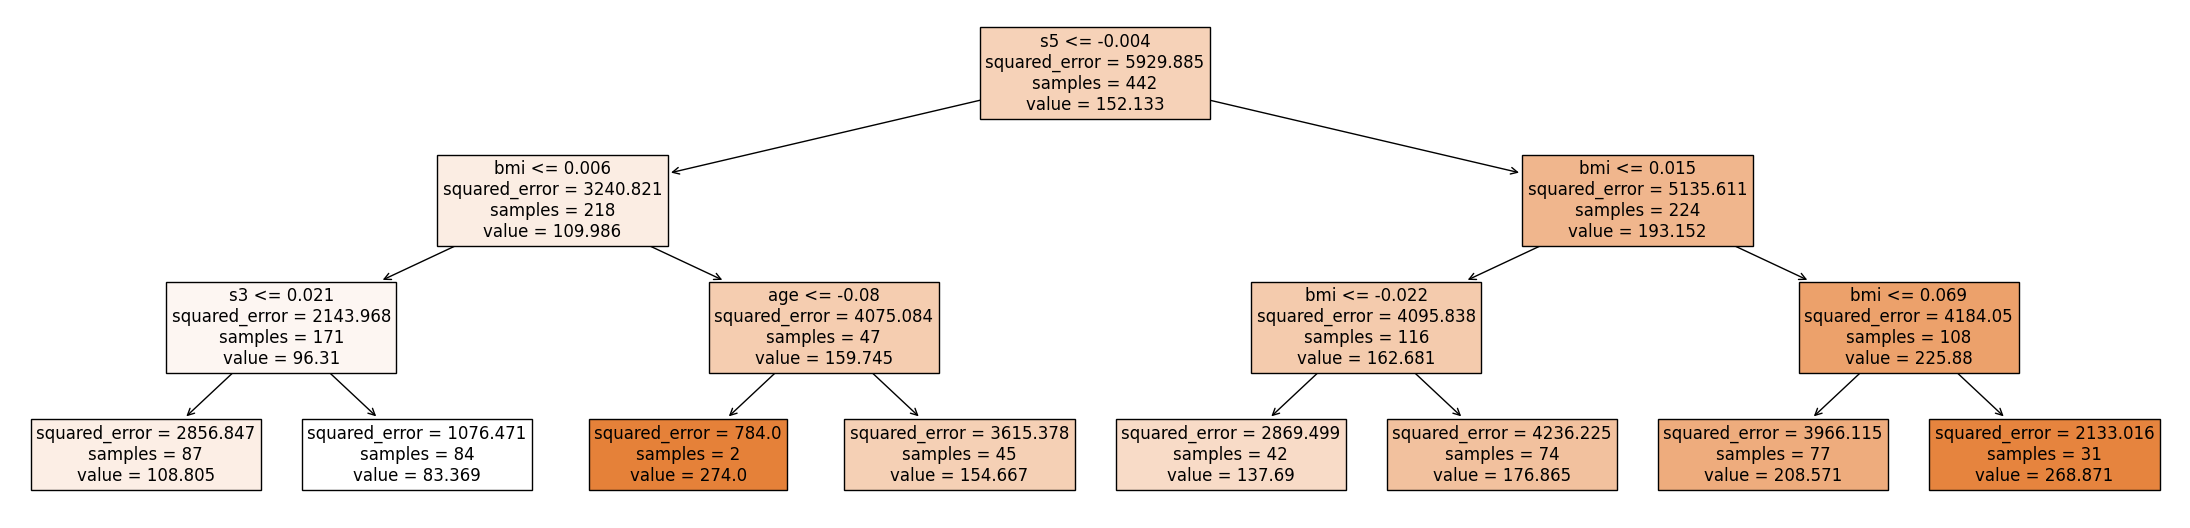

In [16]:
ax = inspector.plot_tree()

In [17]:
# | hide
test_fig_exists(ax)

## Binary Classification Example

In [18]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [19]:
inspector = get_inspector(DecisionTreeClassifier(max_depth=3).fit(X, y), X, y)

In [20]:
# | hide
from model_inspector.inspect.tree import _TreeBinInspector  # noqa: F811

In [21]:
# | hide
assert isinstance(inspector, _TreeBinInspector)

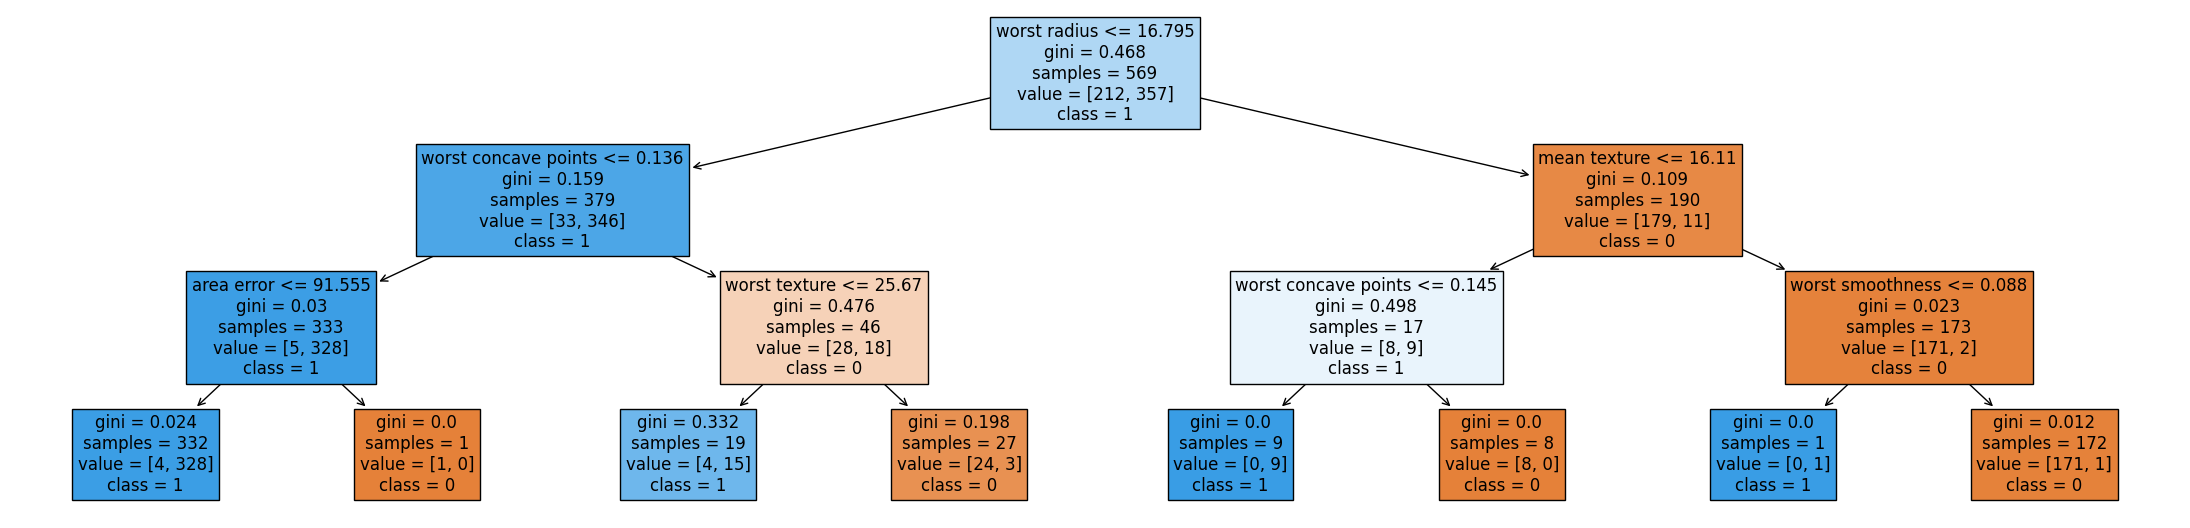

In [22]:
ax = inspector.plot_tree()

In [23]:
# | hide
test_fig_exists(ax)

## Multiclass Example

In [24]:
X, y = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)

In [25]:
dtr = DecisionTreeClassifier(max_depth=3).fit(X, y)
inspector = get_inspector(dtr, X, y)

In [26]:
# | hide
from model_inspector.inspect.tree import _TreeMultiInspector  # noqa: F811

In [27]:
# | hide
assert isinstance(inspector, _TreeMultiInspector)

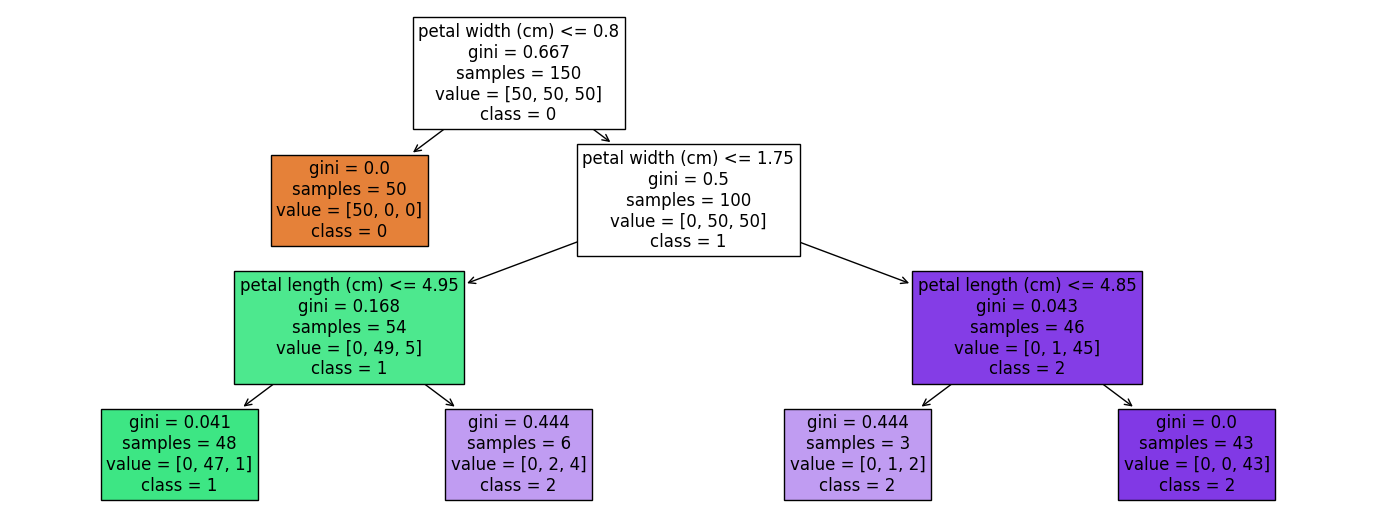

In [28]:
ax = inspector.plot_tree()

In [29]:
# | hide
import os

import matplotlib.testing.compare

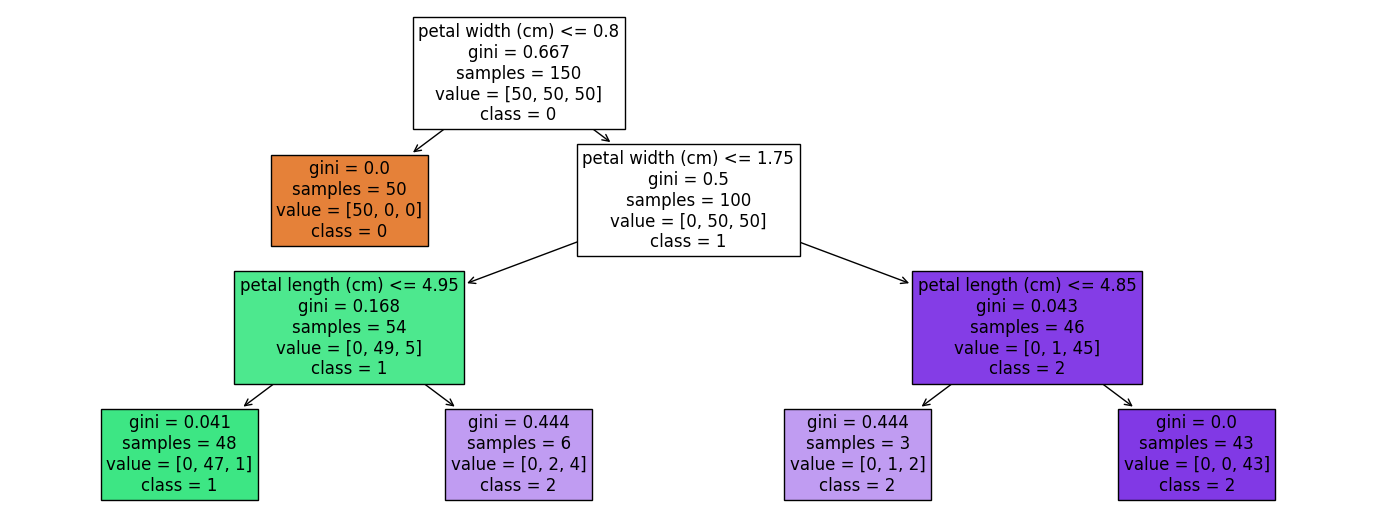

In [30]:
# | hide
"Make sure tree diagram is invariant to data ordering"
ax2 = get_inspector(
    dtr,
    X[::-1],
    y[::-1],
).plot_tree()

ax.get_figure().savefig("tmp1.png")
ax2.get_figure().savefig("tmp2.png")

assert matplotlib.testing.compare.compare_images("tmp1.png", "tmp2.png", 1e-7) is None
os.remove("tmp1.png")
os.remove("tmp2.png")

In [31]:
# | export
_all_ = ["_TreeRegInspector", "_TreeBinInspector", "_TreeMultiInspector"]